# Read CSV File

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats


WC_csv ="WorldCupMatchesUpdate.csv"

WC_df = pd.read_csv(WC_csv)

WC_df.head()

,Unnamed: 0,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Results,Winning Team,Win conditions,MatchID,Home Team Initials,Away Team Initials,City Temperature,Home Team Average Temperature,Away Team Average Temperature,Winning Team Average Temperature
0,0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,H,France,,1096.0,FRA,MEX,11.0,13.0,21.0,13.0
1,1,1954.0,19 Jun 1954 - 17:10,Group 1,Charmilles,Geneva,France,3.0,2.0,Mexico,H,France,,1275.0,FRA,MEX,23.0,13.0,21.0,13.0
2,2,1938.0,05 Jun 1938 - 17:00,First round,Stade Olympique,Colombes,France,3.0,1.0,Belgium,H,France,,1146.0,FRA,BEL,25.0,13.0,10.0,13.0
3,3,1986.0,28 Jun 1986 - 12:00,Match for third place,Cuauhtemoc,Puebla,France,4.0,2.0,Belgium,H,France,France win after extra time,422.0,FRA,BEL,24.0,13.0,10.0,13.0
4,4,1958.0,08 Jun 1958 - 19:00,Group 2,Idrottsparken,Norrk�Ping,France,7.0,3.0,Paraguay,H,France,,1386.0,FRA,PAR,29.0,13.0,23.0,13.0


# Points Tables

In [2]:
# Dataframe to calculate the Number of Wins, Losses, Draws and Points of the Home Teams using loops and If statements
# 2 Points for a win, 1 point for a draw and 0 points of Losses

home_team_points=pd.DataFrame({'Countries':WC_df['Home Team Name'],
                         'Number of Wins':[1 if i=='H' else 0 if i=='D' else 0 for i in WC_df['Results']],
                         'Number of Losses':[1 if i=='A' else 0 if i=='D' else 0 for i in WC_df['Results']],
                         'Number of Draws':[0 if i=='H' else 1 if i=='D' else 0 for i in WC_df['Results']],      
                         'Points':[2 if i=='H' else 1 if i=='D' else 0 for i in WC_df['Results']]})

# Dataframe to calculate the Number of Wins, Losses, Draws and Points of the Away Teams using loops and If statements
# 2 Points for a win, 1 point for a draw and 0 points of Losses

away_team_points=pd.DataFrame({'Countries':WC_df['Away Team Name'],
                         'Number of Wins':[1 if i=='A' else 0 if i=='D' else 0 for i in WC_df['Results']],
                         'Number of Losses':[1 if i=='H' else 0 if i=='D' else 0 for i in WC_df['Results']],
                         'Number of Draws':[0 if i=='H' else 1 if i=='D' else 0 for i in WC_df['Results']],
                         'Points':[2 if i=='A' else 1 if i=='D' else 0 for i in WC_df['Results']]})

# Merging both Home and Away Dataframes Points grouped by Countries
team_points=home_team_points.append(away_team_points).groupby('Countries').sum()
# Print Dataframe
team_points

,Number of Wins,Number of Losses,Number of Draws,Points
Countries,,,,
Algeria,3,7,3,9
Angola,0,1,2,2
Argentina,46,22,9,101
Australia,2,8,3,7
Austria,12,13,4,28
...,...,...,...,...
United Arab Emirates,0,3,0,0
Uruguay,21,19,11,53
Wales,1,1,3,5


# Games Played and Average Points per Game

In [3]:
# Addition of all games to to get Played Games 
games_played=team_points['Number of Wins']+team_points['Number of Losses']+team_points['Number of Draws']

# Divide Points by Games Played
average_points_game=round(team_points['Points']/games_played,3)

# Adding new columns to the Dataframe
team_points['Number of Games Played'] = games_played
team_points['Average Points per Game'] = average_points_game


# Arrange the order of Columns
team_points=team_points[['Number of Games Played','Number of Wins','Number of Losses','Number of Draws','Points','Average Points per Game']]
# Print the Dataframe
team_points.head()

,Number of Games Played,Number of Wins,Number of Losses,Number of Draws,Points,Average Points per Game
Countries,,,,,,
Algeria,13,3,7,3,9,0.692
Angola,3,0,1,2,2,0.667
Argentina,77,46,22,9,101,1.312
Australia,13,2,8,3,7,0.538
Austria,29,12,13,4,28,0.966


# Table Sorted by Points

In [4]:
# Sorted Table
team_points.sort_values(by=['Points'], ascending=False).head(10)

,Number of Games Played,Number of Wins,Number of Losses,Number of Draws,Points,Average Points per Game
Countries,,,,,,
Germany,112,72,22,18,162,1.446
Brazil,104,73,18,13,159,1.529
Italy,83,46,20,17,109,1.313
Argentina,77,46,22,9,101,1.312
England,62,26,19,17,69,1.113
Spain,59,30,20,9,69,1.169
France,59,30,21,8,68,1.153
Netherlands,50,28,13,9,65,1.300
Uruguay,51,21,19,11,53,1.039


# Table Sorted by Average Points per Game

In [5]:
# Sorted table
team_points.sort_values(by=['Average Points per Game'], ascending=False).head(10)

,Number of Games Played,Number of Wins,Number of Losses,Number of Draws,Points,Average Points per Game
Countries,,,,,,
Brazil,104,73,18,13,159,1.529
Germany,112,72,22,18,162,1.446
Italy,83,46,20,17,109,1.313
Argentina,77,46,22,9,101,1.312
Netherlands,50,28,13,9,65,1.300
Senegal,5,2,1,2,6,1.200
Ukraine,5,3,2,0,6,1.200
Portugal,26,14,9,3,31,1.192
Spain,59,30,20,9,69,1.169


# Bar Graphs - Countries vs Average Points per Game

Text(0, 0.5, 'Average Points per Game')

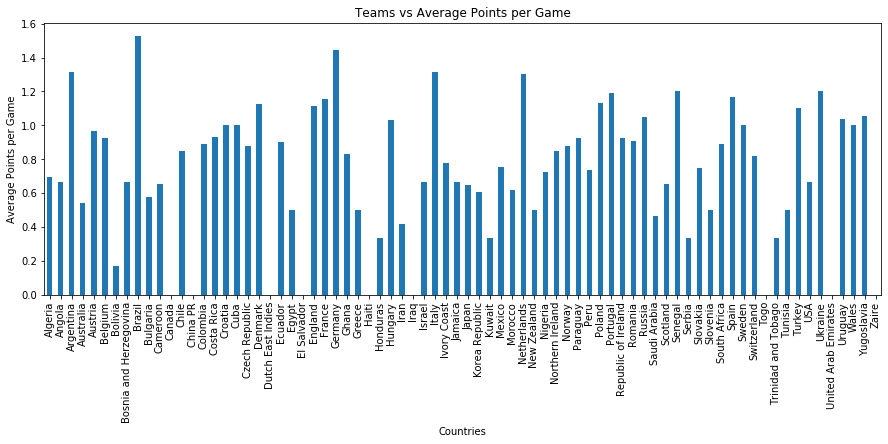

In [6]:
# Bar plot
team_points.plot(kind="bar", figsize=(15,5), legend=False, y='Average Points per Game')

#labels
plt.title("Teams vs Average Points per Game")
plt.ylabel("Average Points per Game")

In [7]:
# New Data Frame with only the Best 10 Team based on Average Points per Game
best_team_points=team_points.nlargest(10, ['Average Points per Game'])
best_team_points

,Number of Games Played,Number of Wins,Number of Losses,Number of Draws,Points,Average Points per Game
Countries,,,,,,
Brazil,104,73,18,13,159,1.529
Germany,112,72,22,18,162,1.446
Italy,83,46,20,17,109,1.313
Argentina,77,46,22,9,101,1.312
Netherlands,50,28,13,9,65,1.300
Senegal,5,2,1,2,6,1.200
Ukraine,5,3,2,0,6,1.200
Portugal,26,14,9,3,31,1.192
Spain,59,30,20,9,69,1.169


Text(0, 0.5, 'Average Points per Game')

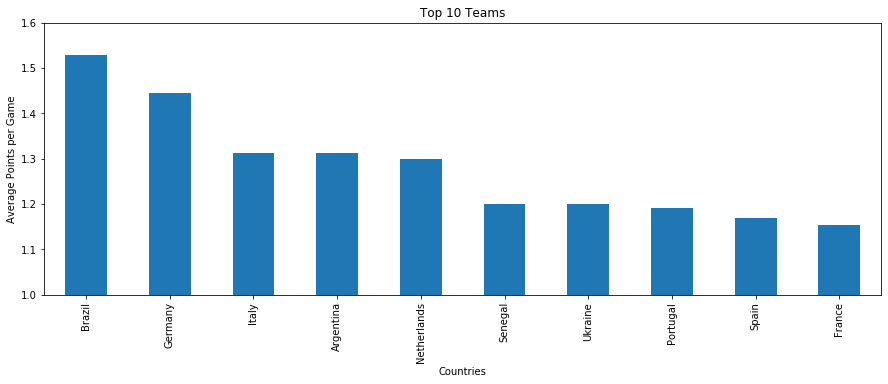

In [8]:
# New Bar Plot Showing the Top 10 Teams vs Average Points per Game

best_team_points.plot(kind="bar", figsize=(15,5), legend=False, y='Average Points per Game')

# Y-axis limits
plt.ylim(1.0, 1.6)

#labels
plt.title("Top 10 Teams")
plt.ylabel("Average Points per Game")

In [9]:
# Export CSV of all the points data
team_points.to_csv("Team_Points.csv",
                  encoding="utf-8", index=True, header=True)

# Calculating Temperature Deltas

In [10]:
# Calculate the Home Team Delta by substracting the Temperature of the Home Team and the Host City
home_team_delta=abs((WC_df['Home Team Average Temperature']-WC_df['City Temperature']))

# Calculate the Home Team Delta by substracting the Temperature of the Away Team and the Host City
away_team_delta=abs((WC_df['Away Team Average Temperature']-WC_df['City Temperature']))

# Calculate the Winning Team Delta by substracting the Temperature of the Away Team and the Host City
winning_team_delta=abs((WC_df['Winning Team Average Temperature']-WC_df['City Temperature']))

# New Dataframe with new Delta Columns
delta_table = pd.DataFrame({"Home Team Name":WC_df['Home Team Name'],
                                    "Away Team Name":WC_df['Away Team Name'],
                                    "Winning Team":WC_df['Winning Team'],
                                    "Winning Team Temperature":WC_df['Winning Team Average Temperature'],
                                    "Host City":WC_df['City'],
                                    "Host City Temperature":WC_df['City Temperature'],
                                    "Home Team Average Temperature":WC_df['Home Team Average Temperature'],
                                    "Away Team Average Temperature":WC_df['Away Team Average Temperature'],
                                    "Home Team Delta":home_team_delta,
                                    "Away Team Delta":away_team_delta,
                                    "Winning Team Delta":winning_team_delta
                           })
delta_table.head()

,Home Team Name,Away Team Name,Winning Team,Winning Team Temperature,Host City,Host City Temperature,Home Team Average Temperature,Away Team Average Temperature,Home Team Delta,Away Team Delta,Winning Team Delta
0,France,Mexico,France,13.0,Montevideo,11.0,13.0,21.0,2.0,10.0,2.0
1,France,Mexico,France,13.0,Geneva,23.0,13.0,21.0,10.0,2.0,10.0
2,France,Belgium,France,13.0,Colombes,25.0,13.0,10.0,12.0,15.0,12.0
3,France,Belgium,France,13.0,Puebla,24.0,13.0,10.0,11.0,14.0,11.0
4,France,Paraguay,France,13.0,Norrk�Ping,29.0,13.0,23.0,16.0,6.0,16.0


# Scatter Plot to Compare Teams Mean Delta Temp to Average Points per Game

In [11]:
#calculations for x-axis
TempMean=delta_table.groupby(["Winning Team"])["Winning Team Delta"].mean()
#calculations for y-axis

#calculations for y-axis
meanAveragePoints= team_points['Average Points per Game']

In [12]:
scatter_table=pd.DataFrame({'Avg Winning Team Delta':TempMean,'Avg Points per Game':meanAveragePoints}).dropna()
scatter_table.head()

,Avg Winning Team Delta,Avg Points per Game
Algeria,1.333333,0.692
Argentina,8.666667,1.312
Australia,1.000000,0.538
Austria,16.583333,0.966
Belgium,17.714286,0.927


Text(0, 0.5, 'Avg Points per Game')

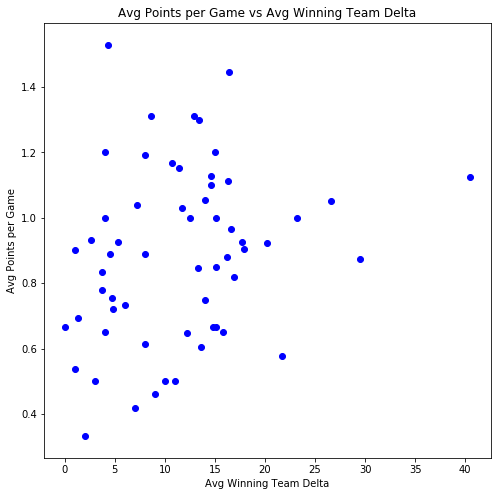

In [13]:
#calculations for x-axis
x_axis=scatter_table["Avg Winning Team Delta"]
#calculations for y-axis
y_axis=scatter_table["Avg Points per Game"]
#scatter plot
plt.figure(figsize=(8,8))
plt.scatter(x_axis, y_axis, marker="o", color="blue")

#labels
plt.title("Avg Points per Game vs Avg Winning Team Delta")
plt.xlabel("Avg Winning Team Delta")
plt.ylabel("Avg Points per Game")

The r-squared is: 0.06


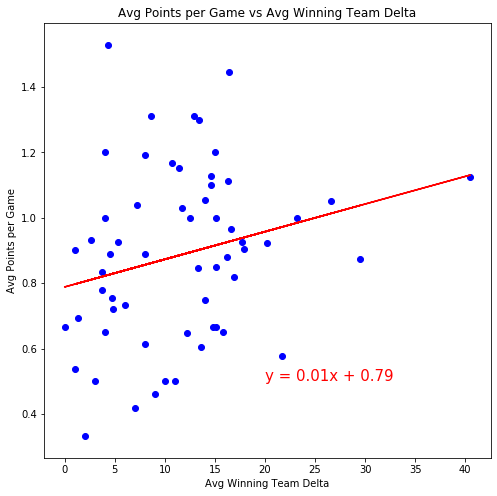

In [14]:
#Calculation for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Duplicate of scatter plot above
plt.figure(figsize=(8,8))
plt.scatter(x_axis, y_axis, marker="o", color="blue")

#Line plot with linear regression
plt.plot(x_axis,regress_values,"r-")

#Anotation inside the graph to show line equation including the slope of line
plt.annotate(line_eq,(20,0.5),fontsize=15,color="red")

#labels
plt.title("Avg Points per Game vs Avg Winning Team Delta")
plt.xlabel("Avg Winning Team Delta")
plt.ylabel("Avg Points per Game")

#show r-squared value
print(f"The r-squared is: {round(rvalue**2,3)}")